In [8]:
import numpy as np
import os, sys

import matplotlib.pylab as plt
import matplotlib as mpl

from astropy.cosmology import Planck15, z_at_value
import astropy.units as u
import astropy.constants as const

from matplotlib import rc_file
rc = os.environ['WORK_DIR']+'/code/matplotlibrc'
if os.path.exists(rc):
    rc_file(rc)

%matplotlib inline

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4,4)

sys.path.append('../')
import bubbles

In [5]:
%load_ext autoreload
%autoreload 2

# Make optical depth

- Mean density and T=1 K
- Mean density and higher T
- Over dense and T=1 K

In [6]:
wave_em = np.linspace(1100, 1300., 2000) * u.Angstrom

tau = bubbles.optical_depth(wave_em, 
                            T=1.*u.K, # neutral IGM temperature at z~7
                            z_min=0., z_max=7.5, z_s=7.5,
                            inside_HII=False, Ndot_ion=0.e57/u.s) # neutral region

tau_highT = bubbles.optical_depth(wave_em, 
                                  T=3.e4*u.K, # heated IGM
                                  z_min=0., z_max=7.5, z_s=7.5,
                                  inside_HII=False, Ndot_ion=0.e57/u.s) # neutral region

tau_dense = bubbles.optical_depth(wave_em, 
                                  T=1.*u.K, # neutral IGM temperature at z~7
                                  z_min=0., z_max=7.5, z_s=7.5,
                                  overdensity=20,
                                  inside_HII=False, Ndot_ion=0.e57/u.s) # neutral region

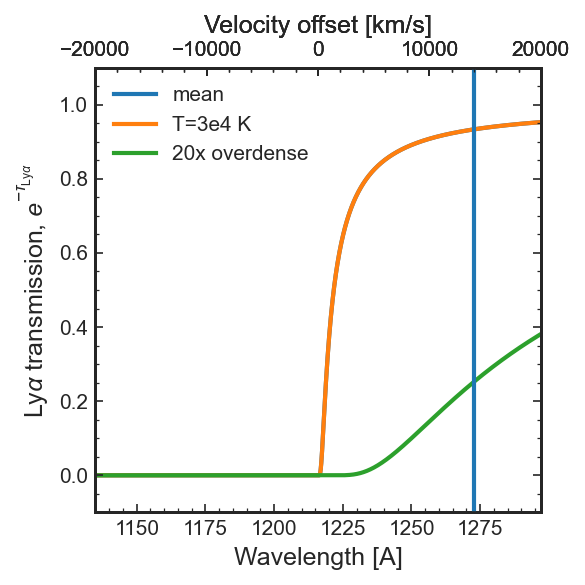

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4,4))

vlim = 20000
bubbles.plot_tau(tau, wave_em, 0.*u.Mpc, ax=ax, vlim=vlim, 
                 transmission=True, label='mean', 
                 leg_loc='upper left', annotate=False)
bubbles.plot_tau(tau_highT, wave_em, 0.*u.Mpc, ax=ax, vlim=vlim,
                 transmission=True, label='T=3e4 K', 
                 leg_loc='upper left', annotate=False)
bubbles.plot_tau(tau_dense, wave_em, 0.*u.Mpc, ax=ax, vlim=vlim, 
                 transmission=True, label='20x overdense', 
                 leg_loc='upper left', annotate=False)

plt.axvline(14000)